# Part I: Importing Data

In [1]:
import numpy as np
import scipy.io
import sklearn.metrics
import sklearn 
import os
import random
import pandas as pd
import time

In [1]:
import collections
def flatten(x):
    result = []
    for el in x:
        result.append(el[0])
        result.append(el[1])
    return result

In [2]:
cwd = os.getcwd()
upperpath = os.path.dirname(cwd) 
uppupperpath = os.path.abspath(os.path.join(os.getcwd(), ".."))
path = uppupperpath + '/data/train_set/'
image_dir = path+"images/"
pt_dir = path+"points/"
label_path = path+"label.csv"

import scipy.io as scio
import numpy as np
path = os.getcwd()
datapath = os.path.dirname(path) + '/data/train_set/'
dataFile = os.path.dirname(path) + '/data/train_set/points/'
img_set = []
for i in range(1, 3001):
    if i < 10:
        img_name = '000' + str(i)
    elif i < 100:
        img_name = '00' + str(i)
    elif i < 1000:
        img_name = '0' + str(i)
    else:
        img_name = str(i)
    image = scio.loadmat(dataFile + img_name + '.mat')

    try:
        image = image['faceCoordinatesUnwarped']
    except KeyError as ke:
        image = image['faceCoordinates2']

    image = np.array(flatten(image))
    img_set.append(image)
img_set = np.array(img_set)
print(img_set.shape)

(3000, 156)


In [4]:
import csv

label=[]
f = csv.reader(open('label.csv','r'))
for i in f:
    if i[0]=='Index':
        continue
    label.append(int(i[1]))
label=np.array(label)
print(label.shape)

(3000,)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import imbalanced_databases as imbd

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(img_set,label,test_size=0.15,random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2550, 156), (2550,), (450, 156), (450,))

In [11]:
X_train[y_train == 0]

array([[420.71875   , 370.64375   , 383.25625   , ..., 446.32838068,
        676.10546875, 392.6703125 ],
       [461.09989373, 369.13230606, 434.83315622, ..., 450.32040383,
        714.21572795, 393.01115834],
       [541.06145251, 383.52793296, 511.00558659, ..., 437.98274955,
        770.33360258, 390.02019386],
       ...,
       [465.25154321, 404.35339506, 427.01697531, ..., 457.84111734,
        709.42194404, 404.92562592],
       [508.17583603, 393.27562028, 471.81661273, ..., 472.4579288 ,
        733.6030205 , 425.59492988],
       [440.60030864, 369.6404321 , 406.3904321 , ..., 421.41605072,
        712.36450663, 360.78718704]])

In [12]:
X_train[y_train == 0][:,1]

array([370.64375   , 369.13230606, 383.52793296, ..., 404.35339506,
       393.27562028, 369.6404321 ])

In [13]:
X_train[y_train == 0][:,0]

array([420.71875   , 461.09989373, 541.06145251, ..., 465.25154321,
       508.17583603, 440.60030864])

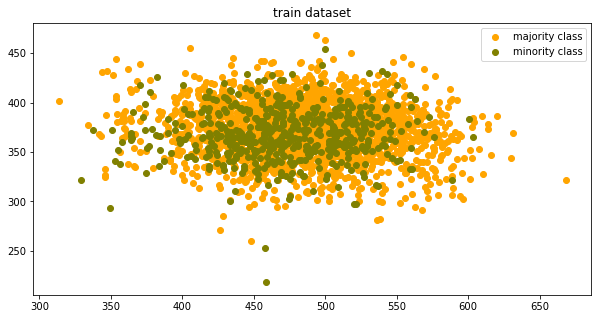

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], label='majority class', c='orange')
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], label='minority class', c='olive')
plt.title('train dataset')
plt.legend()

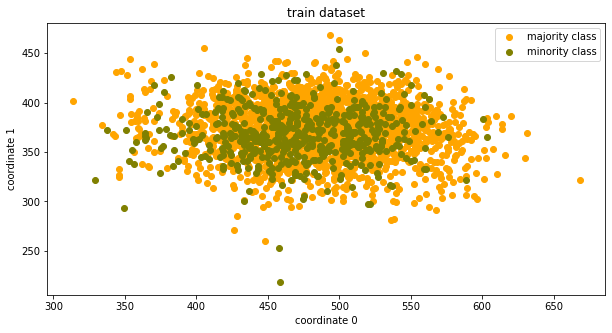

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], label='majority class', c='orange')
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], label='minority class', c='olive')
plt.title('train dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()

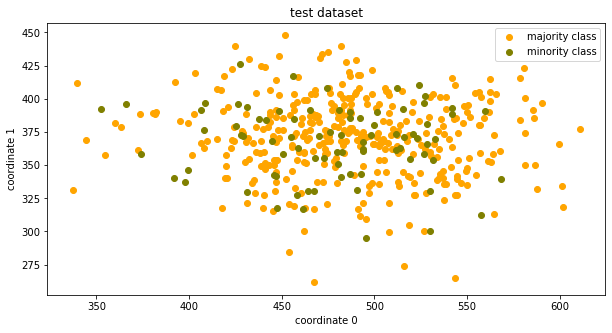

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test[y_test == 0][:,0], X_test[y_test == 0][:,1], label='majority class', c='orange')
plt.scatter(X_test[y_test == 1][:,0], X_test[y_test == 1][:,1], label='minority class', c='olive')
plt.title('test dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()

In [16]:
print('majority class: %d' % np.sum(y_train == 0))
print('minority class: %d' % np.sum(y_train == 1))
print('majority class: %d' % np.sum(y_test == 0))
print('minority class: %d' % np.sum(y_test == 1))

majority class: 2033
minority class: 517
majority class: 369
minority class: 81


#  Oversampling

In [17]:
oversampler= sv.distance_SMOTE() # or sv.ADASYN()/sv.SMOTE()

# X_samp and y_samp contain the oversampled dataset
X_samp_train, y_samp_train = oversampler.sample(X_train, y_train)

2021-03-16 12:19:33,187:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [18]:
# printing the number of samples
print('majority class: %d' % np.sum(y_samp_train == 0))
print('minority class: %d' % np.sum(y_samp_train == 1))

majority class: 2033
minority class: 2033


In [19]:
# filtering new samples
X_samp_train, y_samp_train= X_samp_train[len(X_train):], y_samp_train[len(y_train):]
print('majority new samples: %d' % np.sum(y_samp_train == 0))
print('minority new samples: %d' % np.sum(y_samp_train == 1))

majority new samples: 0
minority new samples: 1516


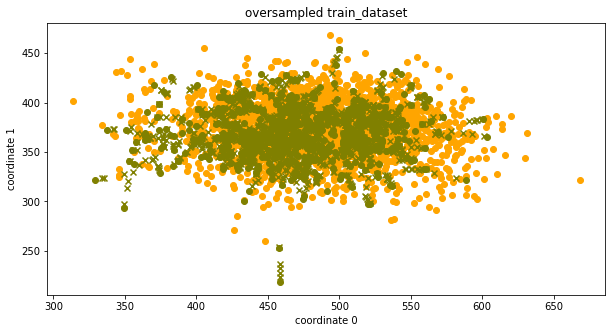

In [20]:
plt.figure(figsize=(10, 5))

plt.scatter(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], label='majority class', c='orange', marker='o')
plt.scatter(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], label='minority class', c='olive', marker='o')
plt.scatter(X_samp_train[y_samp_train == 1][:,0], X_samp_train[y_samp_train == 1][:,1], label='new minority samples', c='olive', marker='x')
plt.title('oversampled train_dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.show()

In [21]:
oversampler= sv.distance_SMOTE() # or sv.ADASYN()/sv.SMOTE()

# X_samp and y_samp contain the oversampled dataset
X_samp_test, y_samp_test= oversampler.sample(X_test, y_test)
# printing the number of samples
print('majority class: %d' % np.sum(y_samp_test == 0))
print('minority class: %d' % np.sum(y_samp_test == 1))

2021-03-16 12:19:39,102:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


majority class: 369
minority class: 369


In [22]:
# filtering new samples
X_samp_test, y_samp_test= X_samp_test[len(X_test):], y_samp_test[len(y_test):]

# printing the number of new samples
print('majority new samples: %d' % np.sum(y_samp_test == 0))
print('minority new samples: %d' % np.sum(y_samp_test == 1))

majority new samples: 0
minority new samples: 288


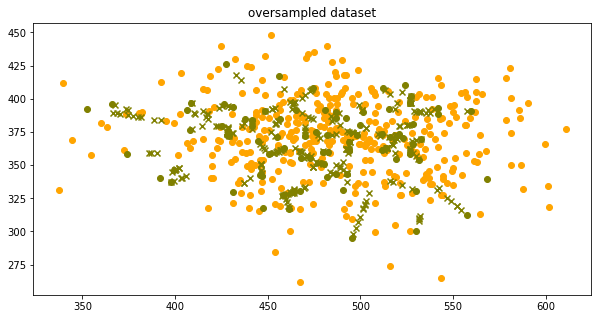

In [23]:
plt.figure(figsize=(10, 5))

plt.scatter(X_test[y_test == 0][:,0], X_test[y_test == 0][:,1], label='majority class', c='orange', marker='o')
plt.scatter(X_test[y_test == 1][:,0], X_test[y_test == 1][:,1], label='minority class', c='olive', marker='o')
plt.scatter(X_samp_test[y_samp_test == 1][:,0], X_samp_test[y_samp_test == 1][:,1], label='new minority samples', c='olive', marker='x')
plt.title('oversampled dataset')
plt.show()

#  Illustrating all oversampling techniques

In [21]:
oversamplers= sv.get_all_oversamplers()

In [ ]:
for o in oversamplers:
    oversampler= o()
    X_samp_test, y_samp_test= oversampler.sample(X_test, y_test)
    
    plt.figure(figsize=(12, 5))
    ax= plt.subplot(121)
    plt.scatter(X_test[y_test == 0][:,0], X_test[y_test == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X_test[y_test == 1][:,0], X_test[y_test == 1][:,1], label='minority class', c='olive', marker='o')
    plt.title('original')
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.legend()
    
    ax= plt.subplot(122)
    plt.scatter(X_samp_test[y_samp_test == 0][:,0], X_samp_test[y_samp_test == 0][:,1], label='majority class', c='orange', marker='o')
    plt.scatter(X_samp_test[y_samp_test == 1][:,0], X_samp_test[y_samp_test == 1][:,1], label='minority class', c='olive', marker='o')
    plt.title(oversampler.__class__.__name__)
    plt.xlabel('coordinate 0')
    plt.ylabel('coordinate 1')
    plt.legend()
    plt.show()

In [ ]:
#SVM

oversampler= sv.distance_SMOTE() # or sv.ADASYN()/sv.SMOTE()

# X_samp and y_samp contain the oversampled dataset
X_samp_train, y_samp_train = oversampler.sample(X_train, y_train)

oversampler= sv.distance_SMOTE() # or sv.ADASYN()/sv.SMOTE()

# X_samp and y_samp contain the oversampled dataset
X_samp_test, y_samp_test= oversampler.sample(X_test, y_test)

In [ ]:
# linear
from sklearn.svm import SVC

svc=SVC(kernel='linear',class_weight='balanced')
svc.fit(X_samp_train,y_samp_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

pre=svc.predict(X_samp_test)
print(accuracy_score(y_samp_test, pre))  # 0.5
print(precision_score(y_samp_test, pre, average=None))
print(recall_score(y_samp_test, pre))


In [ ]:
# linear without sampling
from sklearn.svm import SVC

svc=SVC(kernel='linear',class_weight='balanced')
svc.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

pre=svc.predict(X_test)
print(accuracy_score(y_test, pre))  # 0.5
print(precision_score(y_test, pre, average=None))
print(recall_score(y_test, pre))

# oversamplers with a set of classifiers

In [ ]:
import os.path

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import smote_variants as sv
import sklearn.datasets as datasets
import imbalanced_databases as imbd

In [ ]:
# the evaluation procedure uses a directory for caching

cache_path= os.path.join(os.path.expanduser('~'), 'smote_test')

if not os.path.exists(cache_path):
    os.makedirs(cache_path)

In [ ]:
# specifying the classifiers

knn_classifier= KNeighborsClassifier()
dt_classifier= DecisionTreeClassifier()
# specifying the train dataset 
dataset= {'data': img_set, 'target': label,'name': 'data'}
dataset

In [ ]:
# Executing the model selection using 5 parallel jobs and at most 35 random but meaningful parameter combinations
# with the oversamplers.

samp_obj, cl_obj= sv.model_selection(dataset= dataset,
                                        samplers= sv.get_n_quickest_oversamplers(5),
                                        classifiers= [knn_classifier, dt_classifier],
                                        cache_path= cache_path,
                                        n_jobs= 5,
                                        max_samp_par_comb= 35)

In [ ]:
# Oversampling and training the classifier providing the best results in the model selection procedure
#highest AUC 
X_samp, y_samp= samp_obj.sample(dataset['data'], dataset['target'])
cl_obj.fit(X_samp, y_samp)

X_samp, y_samp
print('majority class: %d' % np.sum(y_samp == 0))
print('minority class: %d' % np.sum(y_samp == 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_samp,y_samp,test_size=0.15,random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# linear without sampling
from sklearn.svm import SVC

svc=SVC(kernel='linear',class_weight='balanced')
svc.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

pre=svc.predict(X_test)
print(accuracy_score(y_test, pre))  # 0.5
print(precision_score(y_test, pre, average=None))
print(recall_score(y_test, pre))